In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')


In [3]:
sep_coins = cv2.imread('Computer-Vision-with-Python/DATA/pennies.jpg')

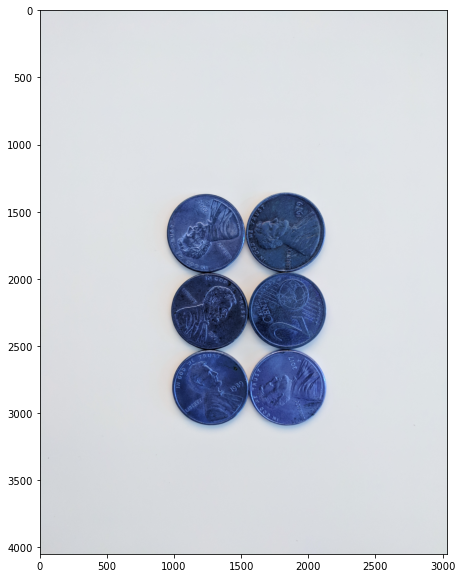

In [4]:
display(sep_coins)

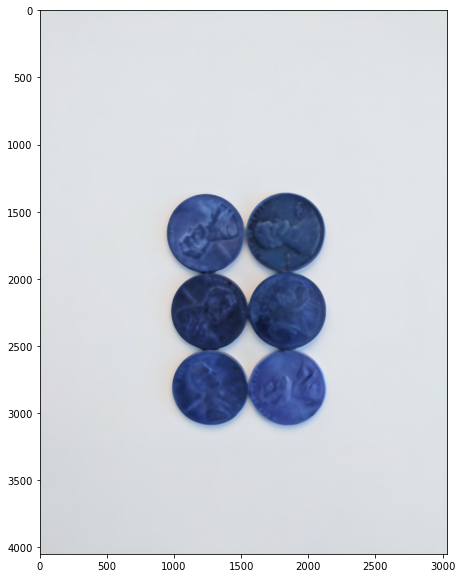

In [6]:
# First we will apply a median blur
sep_blur = cv2.medianBlur(sep_coins,25)
display(sep_blur)

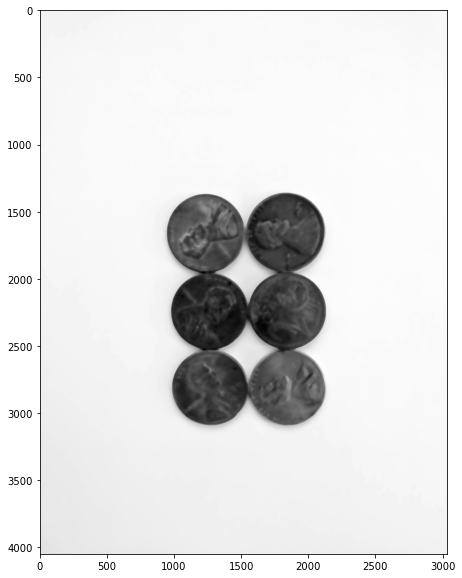

In [8]:
# Grayscale
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)
display(gray_sep_coins)


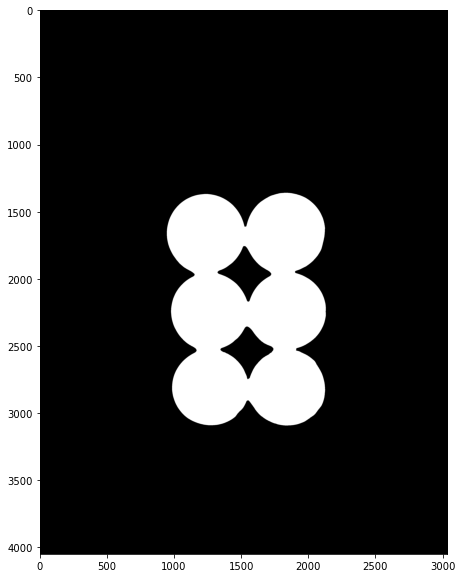

In [9]:
# Binary Threshold
ret, sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)
display(sep_thresh)


In [10]:
# Find Contours
contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

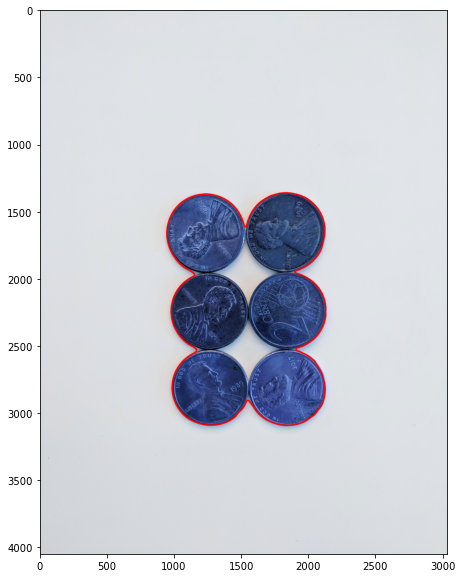

In [11]:
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)
display(sep_coins)

## as we see, the contour does not go all around the coins. we will need more advanced methods

# Watershed Method

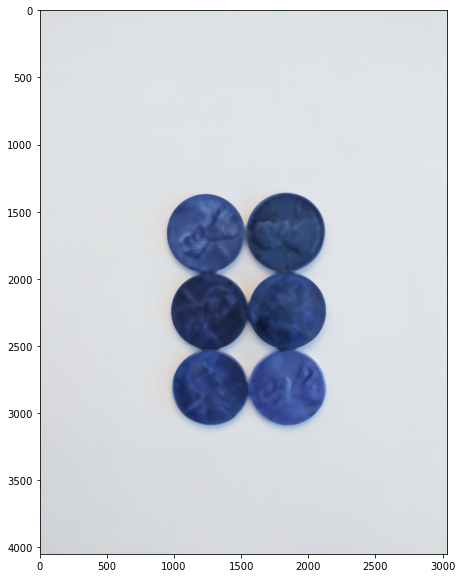

In [47]:
img = cv2.imread('Computer-Vision-with-Python/DATA/pennies.jpg')
# big picture gets big blur
img = cv2.medianBlur(img,35)
display(img)

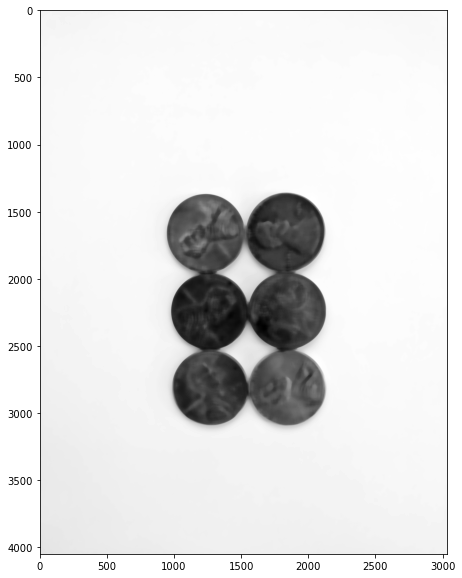

In [48]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
display(gray)

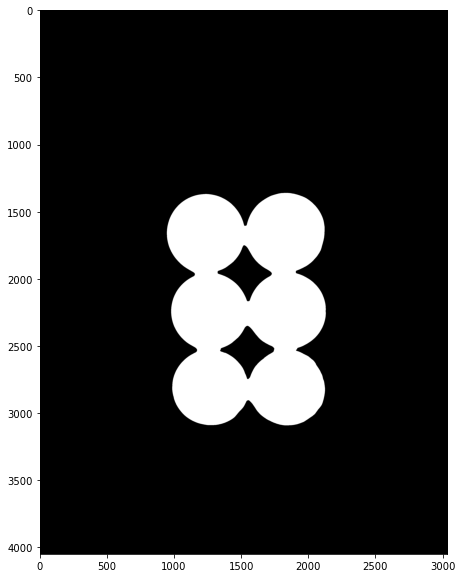

In [49]:
ret, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh)

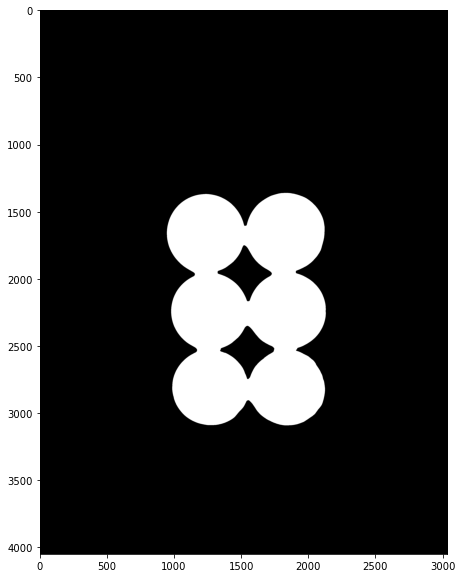

In [50]:
# NOISE REMOVAL (OPTIONAL)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
display(opening)

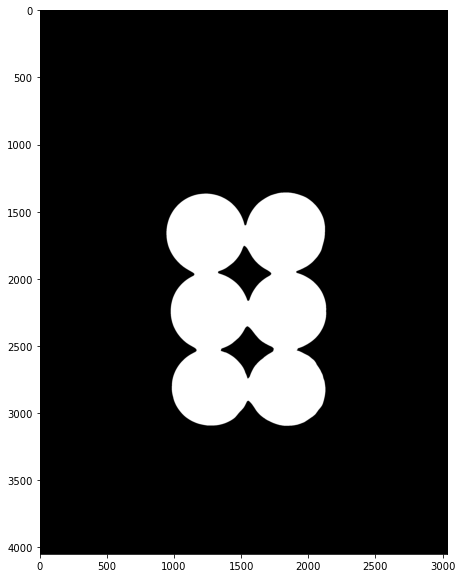

In [51]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)
display(sure_bg)

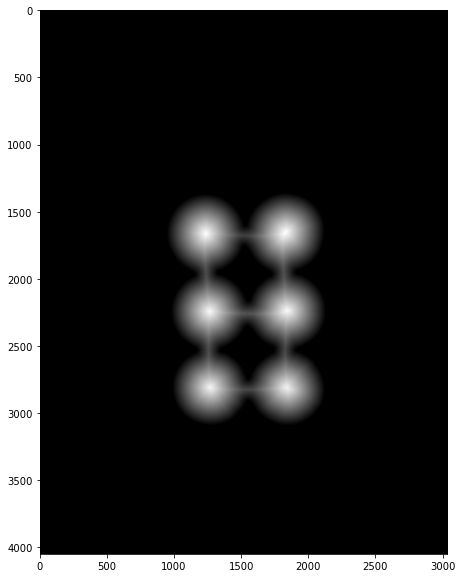

In [52]:
# distance transform
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
display(dist_transform)

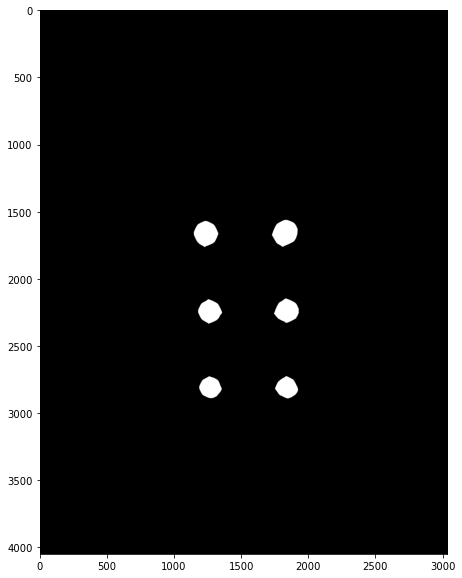

In [53]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
display(sure_fg)

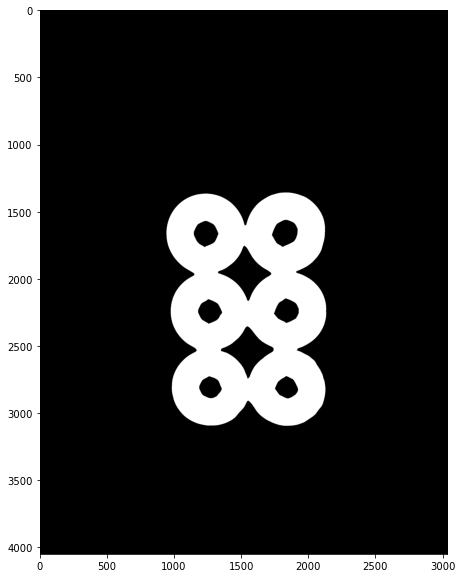

In [54]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
display(unknown)

In [55]:
# getting the markers
ret , markers = cv2.connectedComponents(sure_fg)

In [56]:
markers = markers + 1

In [57]:
markers[unknown==255] = 0

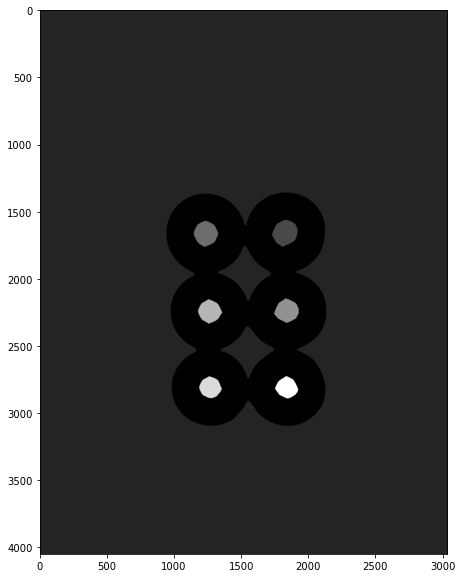

In [58]:
display(markers)

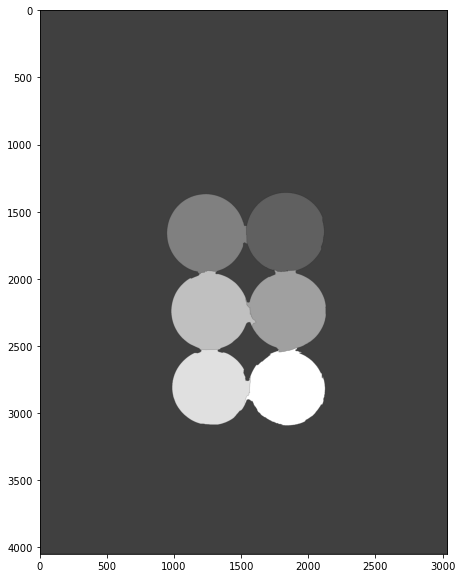

In [59]:
# apply watershed algorithm
markers = cv2.watershed(img,markers)
display(markers)

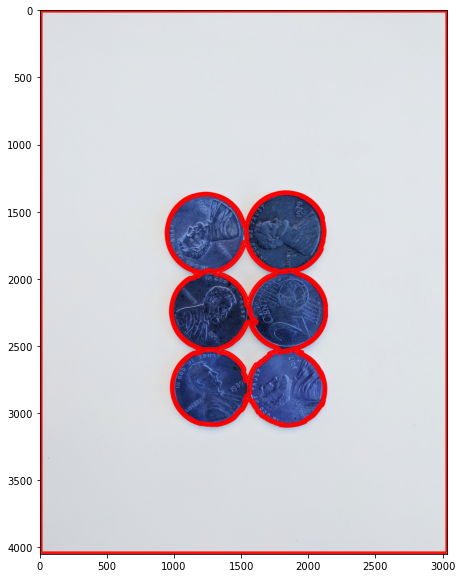

In [60]:
# Find Contours
contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(markers,contours,i,(255,0,0),10)
display(sep_coins)